In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
from sklearn.datasets import load_iris
from sklearn import decomposition

In [3]:
dataset = load_iris() 

In [4]:
X = dataset.data
y = dataset.target 
data = pd.DataFrame(X,columns=dataset.feature_names) 
data["Species"] = y

In [5]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [10]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=4)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape,y_test.shape)

(150, 4) (120, 4) (30, 4)
(150,) (120,) (30,)


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
from sklearn import tree

In [18]:
decisiontree = tree.DecisionTreeClassifier()

In [19]:
pipe = Pipeline(steps=[('decisiontree', decisiontree)])

In [20]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]

In [21]:
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

In [22]:
GS = GridSearchCV(pipe, parameters)

In [23]:
GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('decisiontree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontree__criterion': ['gini', 'entropy'],
                         'decisiontree__max_depth': [4, 6, 8, 10, 12]})

In [24]:
GS.best_estimator_.get_params()['decisiontree__criterion']

'gini'

In [25]:
GS.best_estimator_.get_params()['decisiontree__max_depth']

4

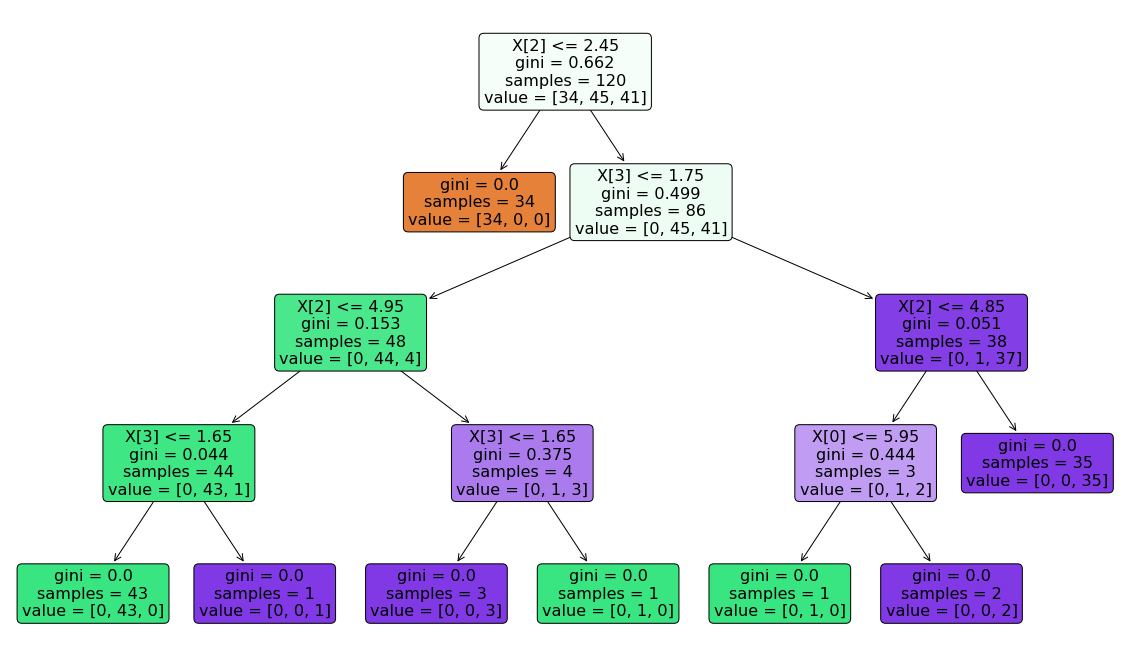

In [26]:
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 4)
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [28]:
prediction = clf.predict([[5.1,3.5,1.4,0.2]])

In [29]:
clf.predict([[5.0,3.6,1.4,0.2]])

array([0])

In [30]:
clf.predict([[6.5,3.0,5.2,2.0]])

array([2])

In [31]:
if (prediction[0]== 0):
    print('setosa')
elif(prediction[0]==1):
    print('versicolor')
else:
    print('verginica')  

setosa
